In [1]:
import torch

from functions.train_test import train, test,train_kd
from functions.data_loader import get_data_loader,load_checkpoint
from models.ViT_early_exit import ViT_early_exit 
from models.ViT_CNN_early_exit import ViT_CNN_early_exit
from functions.helpers import count_parameters
import functions as f

In [2]:
torch.manual_seed(42)

In [3]:
train_loader, test_loader = get_data_loader(
    80, 2, "datasets/cifar-100/cifar-100-python", download=True
)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
model = ViT_early_exit(
        image_size=32,
        dim=64,
        patch_size=4,
        num_classes=100,
        depth=4,
        heads=8,
        mlp_dim=256,
        dropout=0.1,
       early_exit=False
    ).to("cuda")

In [ ]:
train(
    model,
    train_loader,
    test_loader,
    epochs=100,
    learning_rate=0.001,
    device="cuda",
    weight_decay=0.0005,
    save_path='save_model/cifar-100/ViT_early_exit',
    # load_path='save_model/cifar-100/vit_base/best_model.pt'
)

In [4]:
model2 = ViT_CNN_early_exit(
    image_size=32,
    dim=64,
    patch_size=4,
    num_classes=100,
    depth=4,
    heads=8,
    mlp_dim=256,
    dropout=0.1,
    early_exit=False
).to("cuda")

Epoch 1/300, Loss: 4.210491658401489
Current Learning Rate: 0.000999972584682756
accuracy: 7.5%
Test Accuracy: 10.33%
Number of early exits: 125
max_test_accuracy : 10.33
Epoch 2/300, Loss: 3.74034970703125
Current Learning Rate: 0.0009998903417374227
accuracy: 8.75%
Test Accuracy: 15.73%
Number of early exits: 125
max_test_accuracy : 15.73
Epoch 3/300, Loss: 3.4747396827697754
Current Learning Rate: 0.0009997532801828658
accuracy: 15.0%
Test Accuracy: 19.71%
Number of early exits: 125
max_test_accuracy : 19.71
Epoch 4/300, Loss: 3.290133608627319
Current Learning Rate: 0.0009995614150494292
accuracy: 20.0%
Test Accuracy: 22.73%
Number of early exits: 125
max_test_accuracy : 22.73
Epoch 5/300, Loss: 3.1433286323547365
Current Learning Rate: 0.000999314767377287
accuracy: 18.75%
Test Accuracy: 24.98%
Number of early exits: 125
max_test_accuracy : 24.98
Epoch 6/300, Loss: 3.029430313873291
Current Learning Rate: 0.0009990133642141358
accuracy: 30.0%
Test Accuracy: 26.79%
Number of early 

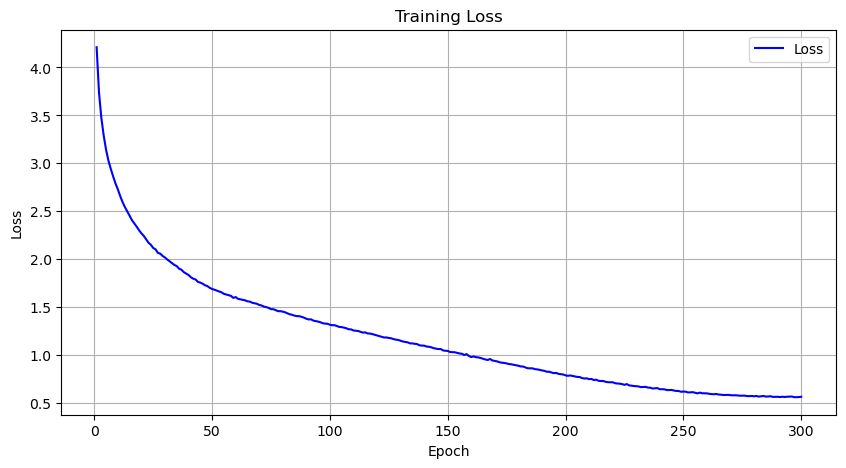

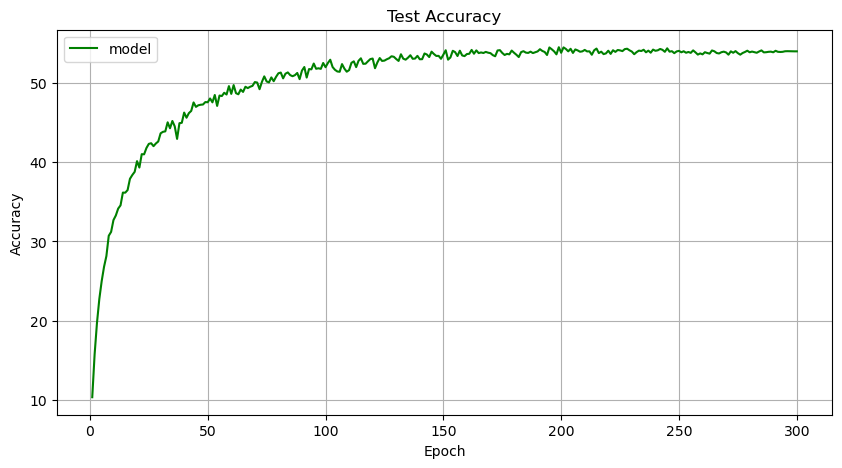

In [5]:
train(
    model2,
    train_loader,
    test_loader,
    epochs=300,
    learning_rate=0.001,
    device="cuda",
    weight_decay=0.0005,
    save_path='save_model/cifar-100/ViT_CNN_early_exit3',
    # load_path='save_model/cifar-100/vit_base/best_model.pt'
)

In [ ]:
model2_test = ViT_CNN_early_exit(
    image_size=32,
    dim=64,
    patch_size=4,
    num_classes=100,
    depth=6,
    heads=6,
    mlp_dim=256,
    dropout=0.1,
    early_exit=True
).to("cuda")

In [ ]:
load_checkpoint(model2_test,'save_model/cifar-100/ViT_CNN_early_exit/best_model.pt')

In [ ]:
train_loader_1_example, test_loader_1_example = f.data_loader.get_data_loader(
    1, 2, "datasets/cifar-100/cifar-100-python", download=True
)

In [ ]:
model_test,num_early_exits = test(model2_test,test_loader_1_example,'cuda')
